# Standard Suite (v1) Metrics -- Usage Examples

This notebook will demonstrate how to call the specific functions defined in the 
{doc}`/evaluation/Metrics_StdSuite_v1`
notebook, using a small demonstration dataset.

In [3]:
import pandas as pd
import numpy as np

## Sample Data

In [4]:
sampleData = pd.read_csv(r"../nwm_streamflow/NWM_Benchmark_SampleData.csv", index_col='date').dropna()
print(len(sampleData.index), " Records")
sampleData.head()

12145  Records


,site_no,obs,nwm,nhm
date,,,,
1983-10-01,1104200,1.121347,6.175417,1.469472
1983-10-02,1104200,1.214793,6.250417,1.848861
1983-10-03,1104200,0.872159,6.215833,2.169456
1983-10-04,1104200,0.419089,6.105000,2.200083
1983-10-05,1104200,0.849505,5.952500,1.931588


## Import Metric Functions
The functions are defined in an 
{doc}`evaluation/Metrics_StdSuite_v1`.  
They are imported for use here by running that notebook from within the following cell:

In [7]:
%run ../../Metrics_StdSuite_v1.ipynb
# This brings functions defined in external notebook into this notebook's namespace.

The functions are now available here, to run against our sample data.  These are called with two
arguments: an array/series of observed values and an array/series of modeled/simulated values.

A couple of examples: 

In [8]:
# Mean Square Error
MSE(obs=sampleData['obs'], sim=sampleData['nwm'])

55.73589185136414

In [9]:
# Kling-Gupta efficiency
KGE(obs=sampleData['obs'], sim=sampleData['nwm'])

0.3286282290159971

## Create Composite Benchmark
It is useful to combine several of these metrics into a single benchmark routine, which returns a 
pandas [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) of 
the assembled metrics.

This example computes those metrics which might apply to the `streamflow` variable. 

In [10]:
def compute_benchmark(df):
    obs = df['obs']
    sim = df['nwm']
    return pd.Series(
        data={
            'NSE': NSE(obs, sim),
            'KGE': KGE(obs, sim),
            'logNSE': logNSE(obs, sim),
            'pbias': pbias(obs, sim),
            'rSD': rSD(obs, sim),
            'pearson': pearson_r(obs, sim),
            'spearman': spearman_r(obs, sim), 
            'pBiasFMS': pBiasFMS(obs, sim),
            'pBiasFLV': pBiasFLV(obs, sim),
            'pBiasFHV': pBiasFHV(obs, sim)
        },
        name=df['site_no'][0], # special case -- 'site_no' column
        dtype='float64'
    )

In [11]:
compute_benchmark(sampleData)

NSE          0.002319
KGE          0.328628
logNSE       0.184820
pbias       52.561009
rSD          1.375604
pearson      0.817255
spearman     0.804573
pBiasFMS   -34.136547
pBiasFLV    81.492827
pBiasFHV    32.058168
Name: 1104200, dtype: float64

## Streamflow and FDC plots
In the case of `streamflow`, the NWM standard suite offers a way to plot the Flow Duration Curve when calculating the pBias metrics per Yilmaz et al. This mechanism uses [matplotlib](https://matplotlib.org/) to implement the figures. 

Some examples: 

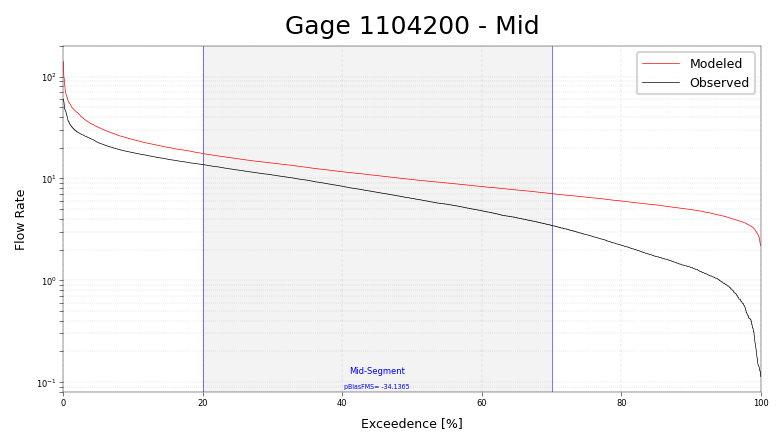

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=150)
ax = FDCplot(sampleData['obs'], sampleData['nwm'], ax, segment='mid')
ax.set_title("Gage 1104200 - Mid")
plt.show()

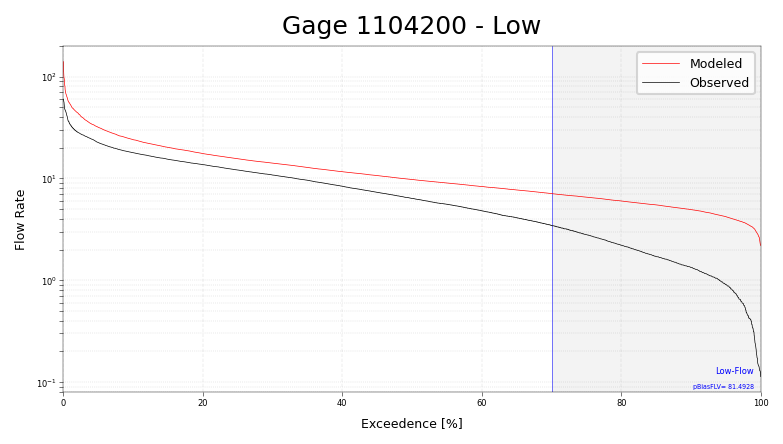

In [33]:
# Same fig, but with "segment='lo'"
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=150)
ax = FDCplot(sampleData['obs'], sampleData['nwm'], ax, segment='lo')
ax.set_title("Gage 1104200 - Low")
plt.show()

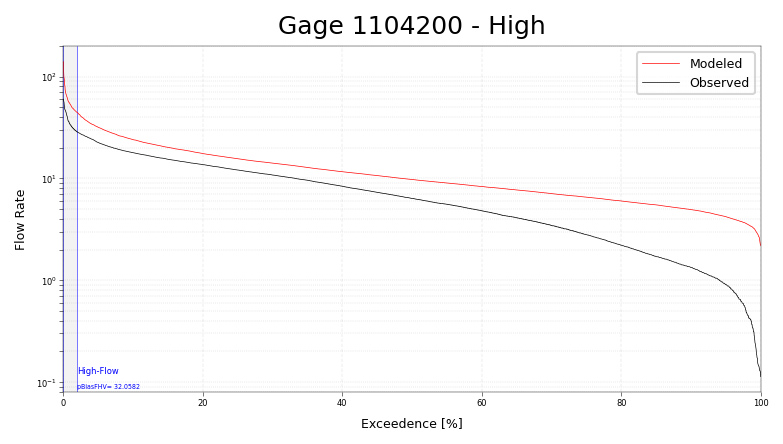

In [34]:
# Same fig, but with "segment='hi'"
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=150)
ax = FDCplot(sampleData['obs'], sampleData['nwm'], ax, segment='hi')
ax.set_title("Gage 1104200 - High")
plt.show()

The default behavior is to plot the Y axis log-scale, and to leave units off of the flow rate.
If you would like to manipulate these parameters, you may adjust the `ax` after calling `FDCplot()`
(see example, next cell). In general, any of the matplotlib parameters can be adjusted after
`FDCplot()` in order to customize the figure.

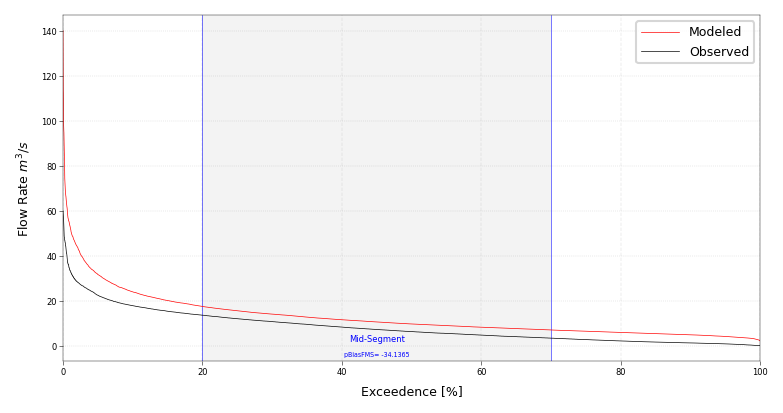

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=150)
ax = FDCplot(sampleData['obs'], sampleData['nwm'], ax, segment='mid')
ax.set_yscale('linear')
ax.set_ylabel("Flow Rate $m^3 / s$") # << labels can contain LaTex-style math between $ chars
plt.show()